In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity


In [3]:
rating = pd.read_csv('rating.csv')
rating.head()


,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [6]:
data = pd.read_csv('anime.csv')
data.head()


,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [7]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [8]:
print(data.describe())

           anime_id        rating       members
count  12294.000000  12064.000000  1.229400e+04
mean   14058.221653      6.473902  1.807134e+04
std    11455.294701      1.026746  5.482068e+04
min        1.000000      1.670000  5.000000e+00
25%     3484.250000      5.880000  2.250000e+02
50%    10260.500000      6.570000  1.550000e+03
75%    24794.500000      7.180000  9.437000e+03
max    34527.000000     10.000000  1.013917e+06


In [9]:
print("Check for null values for data Dataframe \n" ,data.isna().sum())
data.dropna(inplace=True)

Check for null values for data Dataframe 
 anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64


In [10]:
print("Check for null values for rating Datafram" ,data.isna().sum())


Check for null values for rating Datafram anime_id    0
name        0
genre       0
type        0
episodes    0
rating      0
members     0
dtype: int64


In [11]:
rating_dis=rating['rating'].value_counts()
rating_dis

rating
 8     1646019
-1     1476496
 7     1375287
 9     1254096
 10     955715
 6      637775
 5      282806
 4      104291
 3       41453
 2       23150
 1       16649
Name: count, dtype: int64

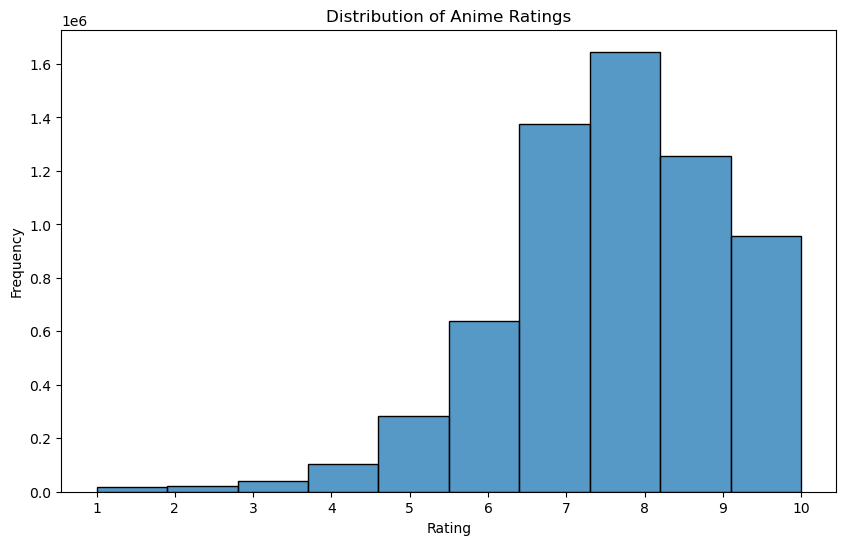

In [12]:
import seaborn as sns

def histogram(data , valid):
    if(not valid):
        valid_ratings = data[data['rating'] != -1]
        plt.figure(figsize=(10, 6))
        sns.histplot(valid_ratings['rating'], bins=10, kde=False)  
        plt.title('Distribution of Anime Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.xticks(range(1, 11))  
        plt.show()
        
    else:
        plt.figure(figsize=(10, 6))
        sns.histplot(data['rating'], bins=10, kde=False)  
        plt.title('Distribution of Anime Ratings')
        plt.xlabel('Rating')
        plt.ylabel('Frequency')
        plt.xticks(range(1, 11))  
        plt.show()
        
        
    

histogram(rating , False)

In [13]:
median_rating = rating[rating['rating'] != -1]['rating'].median()
median_rating


8.0

In [14]:
rating['rating'].replace(-1, median_rating, inplace=True)


In [15]:
rating.head(3)

,user_id,anime_id,rating
0,1,20,8
1,1,24,8
2,1,79,8


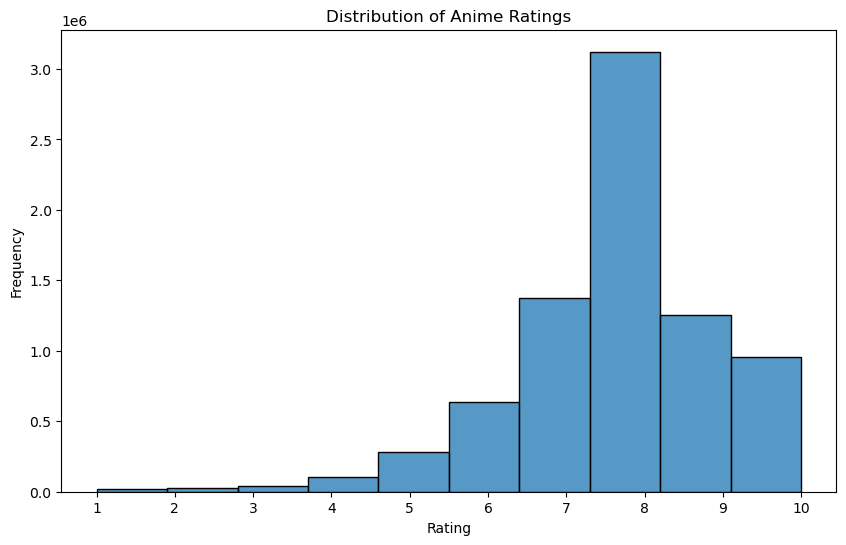

In [16]:
histogram(rating , True)

Creating Item Profiles
Each item in the system is described by a profile that captures its essential characteristics. For movies, this could include details about the cast, the director, the year it was released, and its genres. This information is quantified using techniques such as TF-IDF vectorization:

Term Frequency (TF): This is a count of how often a particular word appears in a document relative to the most frequent word in that document.

recommendation system - Term Frequency

![alt text](Screenshot-from-2024-05-20-19-20-38.png)
Term Frequency
Inverse Document Frequency (IDF): This calculates how unique a word is across all documents; more unique words are given higher importance.

![alt text](image25.png)
Inverse Document Frequency
Term Frequency-Inverse Document Frequency (TF-IDF) is a number used in searching and natural language processing(NLP). It helps to find how important a word is in a document when you look at a bunch of documents together (called a corpus). TF measures how often a word appears in a document. IDF looks at how rare a word is across all documents, giving more weight to unique words. By multiplying TF and IDF, you get the TF-IDF score, which tells you how important each word is in that document.
![alt text](image24.png)

Term Frequency-Inverse Document Frequency

# Collaborative Filtering

In [17]:
data.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [18]:
print("Mean ",rating['user_id'].value_counts().mean())
print('------------------------------')
print(rating['user_id'].value_counts())

Mean  106.28765558049378
------------------------------
user_id
48766    10227
42635     3747
53698     2905
57620     2702
59643     2633
         ...  
11323        1
48775        1
11328        1
48743        1
46734        1
Name: count, Length: 73515, dtype: int64


In [19]:
rating['user_id'].unique().shape

(73515,)

In [20]:
x = rating['user_id'].value_counts() > 200
x[x].shape

(11193,)

In [21]:
y = x[x].index
y

Index([48766, 42635, 53698, 57620, 59643, 51693, 27364, 45659,  7345, 66021,
       ...
       10975, 65884,  6937, 22036, 29916, 31783, 55374, 23203, 49616, 44107],
      dtype='int64', name='user_id', length=11193)

In [22]:
rating = rating[rating['user_id'].isin(y)]
rating.head()
print(rating.shape)

(4172305, 3)


In [23]:
merged_data = rating.merge(data, on='anime_id')
merged_data


,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
0,5,6,8,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
1,17,6,7,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
2,129,6,9,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
3,160,6,7,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
4,226,6,8,Trigun,"Action, Comedy, Sci-Fi",TV,26,8.32,283069
...,...,...,...,...,...,...,...,...,...
4172192,69964,32087,6,Osomatsu-kun (1988): Appare! Chibita no Onitai...,Comedy,Special,1,6.29,193
4172193,69964,32088,6,Osomatsu-kun: Iyami wa Hitori Kaze no Naka,"Comedy, Historical",OVA,1,6.40,191
4172194,70463,29481,8,Kakinoki Mokkii,"Fantasy, Kids",Special,1,4.33,61
4172195,72404,34412,8,Hashiri Hajimeta bakari no Kimi ni,Music,Music,1,6.76,239


In [24]:
merged_data.drop('rating_y' , inplace=True , axis=1)


In [25]:
merged_data['genre'] = merged_data['genre'] +","+ merged_data['type']
merged_data

,user_id,anime_id,rating_x,name,genre,type,episodes,members
0,5,6,8,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069
1,17,6,7,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069
2,129,6,9,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069
3,160,6,7,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069
4,226,6,8,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069
...,...,...,...,...,...,...,...,...
4172192,69964,32087,6,Osomatsu-kun (1988): Appare! Chibita no Onitai...,"Comedy,Special",Special,1,193
4172193,69964,32088,6,Osomatsu-kun: Iyami wa Hitori Kaze no Naka,"Comedy, Historical,OVA",OVA,1,191
4172194,70463,29481,8,Kakinoki Mokkii,"Fantasy, Kids,Special",Special,1,61
4172195,72404,34412,8,Hashiri Hajimeta bakari no Kimi ni,"Music,Music",Music,1,239


In [26]:
merged_data['genre_list'] = merged_data['genre'].apply(lambda x: x.split(','))
merged_data.head()


,user_id,anime_id,rating_x,name,genre,type,episodes,members,genre_list
0,5,6,8,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]"
1,17,6,7,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]"
2,129,6,9,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]"
3,160,6,7,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]"
4,226,6,8,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]"


In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

mlb = MultiLabelBinarizer()
genre_encoded = pd.DataFrame(mlb.fit_transform(merged_data['genre_list']), columns=mlb.classes_, index=merged_data.index)

merged_data = pd.concat([merged_data, genre_encoded], axis=1)


In [28]:
merged_data.head()

,user_id,anime_id,rating_x,name,genre,type,episodes,members,genre_list,Adventure,...,Shounen,Slice of Life,Special,Sports,Super Power,Supernatural,TV,Thriller,Vampire,Yaoi
0,5,6,8,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]",0,...,0,0,0,0,0,0,1,0,0,0
1,17,6,7,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]",0,...,0,0,0,0,0,0,1,0,0,0
2,129,6,9,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]",0,...,0,0,0,0,0,0,1,0,0,0
3,160,6,7,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]",0,...,0,0,0,0,0,0,1,0,0,0
4,226,6,8,Trigun,"Action, Comedy, Sci-Fi,TV",TV,26,283069,"[Action, Comedy, Sci-Fi, TV]",0,...,0,0,0,0,0,0,1,0,0,0


In [29]:
anime_rating_pivot = merged_data.pivot_table(columns='anime_id' , index='user_id' , values='rating_x')


In [30]:
anime_rating_pivot.fillna(0,inplace=True)

In [31]:
anime_rating_pivot.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,10.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
from scipy.sparse import csr_matrix

In [33]:
anime_rating_pivot_sparse = csr_matrix(anime_rating_pivot)

In [34]:
user_similarity = cosine_similarity(anime_rating_pivot_sparse)

user_similarity_df = pd.DataFrame(user_similarity, index=anime_rating_pivot.index, columns=anime_rating_pivot.index)




In [35]:
user_similarity_df

user_id,5,7,17,38,43,46,54,123,129,139,...,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
user_id,,,,,,,,,,,,,,,,,,,,,
5,1.000000,0.242267,0.278503,0.253759,0.234611,0.262020,0.241473,0.236637,0.241545,0.195999,...,0.201523,0.131088,0.173782,0.163494,0.088701,0.073803,0.293286,0.174479,0.185205,0.144848
7,0.242267,1.000000,0.306882,0.250948,0.241682,0.162765,0.257063,0.083154,0.063208,0.193377,...,0.137438,0.076671,0.161085,0.183729,0.066474,0.086210,0.217294,0.232154,0.148110,0.100723
17,0.278503,0.306882,1.000000,0.370378,0.206949,0.268163,0.272941,0.261134,0.225718,0.377788,...,0.149948,0.136279,0.352380,0.191358,0.183781,0.074840,0.341191,0.270100,0.277465,0.204318
38,0.253759,0.250948,0.370378,1.000000,0.423492,0.335190,0.285766,0.291169,0.311381,0.427979,...,0.198153,0.109857,0.285033,0.172555,0.097272,0.116338,0.276486,0.278810,0.379954,0.192923
43,0.234611,0.241682,0.206949,0.423492,1.000000,0.278209,0.274428,0.246858,0.202510,0.207152,...,0.152270,0.110064,0.155964,0.175709,0.115266,0.090781,0.204714,0.205044,0.320090,0.148166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73491,0.073803,0.086210,0.074840,0.116338,0.090781,0.092097,0.272228,0.052664,0.125190,0.073296,...,0.178897,0.190825,0.065525,0.139064,0.116254,1.000000,0.238704,0.228098,0.086589,0.293055
73499,0.293286,0.217294,0.341191,0.276486,0.204714,0.238795,0.332679,0.168170,0.287433,0.229901,...,0.181455,0.139545,0.305770,0.342210,0.163288,0.238704,1.000000,0.421474,0.265387,0.290846
73502,0.174479,0.232154,0.270100,0.278810,0.205044,0.158237,0.384929,0.115382,0.213626,0.204803,...,0.146799,0.168176,0.276300,0.373244,0.221188,0.228098,0.421474,1.000000,0.229738,0.366044


In [36]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(metric='cosine', algorithm='brute')

In [37]:
model.fit(user_similarity_df)

NearestNeighbors(algorithm='brute', metric='cosine')

In [38]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(model, 'cf_model.pkl')


['cf_model.pkl']

In [39]:
import numpy as np
d = np.array([[1,2,2,3,3,4] , [1,2,34,5,6 ,4]])
d.reshape(1,-1)
d


array([[ 1,  2,  2,  3,  3,  4],
       [ 1,  2, 34,  5,  6,  4]])

In [40]:
anime_rating_pivot.shape

(11193, 11154)

In [41]:
#if we want the simmilarity row for user id 5 with index 0 
user_idx = user_similarity_df.index.get_loc(5)
user_similarity_df.iloc[ user_idx , : ]

user_id
5        1.000000
7        0.242267
17       0.278503
38       0.253759
43       0.234611
           ...   
73491    0.073803
73499    0.293286
73502    0.174479
73503    0.185205
73507    0.144848
Name: 5, Length: 11193, dtype: float64

In [42]:
distance,suggestion = model.kneighbors(user_similarity_df.iloc[user_idx , :].values.reshape(1,-1),n_neighbors=10  )

In [43]:
suggestion

array([[    0, 10978,  2861,  4288,  5368,   543,  4087, 10509,   288,
         1967]], dtype=int64)

In [44]:
suggestion[0][1]

10978

In [45]:
def get_anime_name(suggestion):
    
        anime_names = merged_data[merged_data['anime_id'].isin(suggestion[0])]
        return anime_names[['name' , 'genre']].drop_duplicates()



get_anime_name(suggestion)




,name,genre
118154,Bakuten Shoot Beyblade,"Action, Adventure, Comedy, Sci-Fi, Shounen, Sp..."
1571034,Vampire Hunter D (2000),"Action, Drama, Fantasy, Horror, Romance, Sci-F..."
2277148,Michiko to Hatchin,"Action, Adventure,TV"
3921521,Mobile Suit Zeta Gundam: A New Translation - H...,"Drama, Mecha, Military, Sci-Fi, Space,Movie"
4137346,Seifuku Shojo The Animation,"Hentai,OVA"
4171005,Hoero! Bun Bun (Movie),"Kids,Movie"


In [46]:
anime_rating_pivot.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
38,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
43,10.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
user_similarity_df

user_id,5,7,17,38,43,46,54,123,129,139,...,73460,73462,73476,73477,73485,73491,73499,73502,73503,73507
user_id,,,,,,,,,,,,,,,,,,,,,
5,1.000000,0.242267,0.278503,0.253759,0.234611,0.262020,0.241473,0.236637,0.241545,0.195999,...,0.201523,0.131088,0.173782,0.163494,0.088701,0.073803,0.293286,0.174479,0.185205,0.144848
7,0.242267,1.000000,0.306882,0.250948,0.241682,0.162765,0.257063,0.083154,0.063208,0.193377,...,0.137438,0.076671,0.161085,0.183729,0.066474,0.086210,0.217294,0.232154,0.148110,0.100723
17,0.278503,0.306882,1.000000,0.370378,0.206949,0.268163,0.272941,0.261134,0.225718,0.377788,...,0.149948,0.136279,0.352380,0.191358,0.183781,0.074840,0.341191,0.270100,0.277465,0.204318
38,0.253759,0.250948,0.370378,1.000000,0.423492,0.335190,0.285766,0.291169,0.311381,0.427979,...,0.198153,0.109857,0.285033,0.172555,0.097272,0.116338,0.276486,0.278810,0.379954,0.192923
43,0.234611,0.241682,0.206949,0.423492,1.000000,0.278209,0.274428,0.246858,0.202510,0.207152,...,0.152270,0.110064,0.155964,0.175709,0.115266,0.090781,0.204714,0.205044,0.320090,0.148166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73491,0.073803,0.086210,0.074840,0.116338,0.090781,0.092097,0.272228,0.052664,0.125190,0.073296,...,0.178897,0.190825,0.065525,0.139064,0.116254,1.000000,0.238704,0.228098,0.086589,0.293055
73499,0.293286,0.217294,0.341191,0.276486,0.204714,0.238795,0.332679,0.168170,0.287433,0.229901,...,0.181455,0.139545,0.305770,0.342210,0.163288,0.238704,1.000000,0.421474,0.265387,0.290846
73502,0.174479,0.232154,0.270100,0.278810,0.205044,0.158237,0.384929,0.115382,0.213626,0.204803,...,0.146799,0.168176,0.276300,0.373244,0.221188,0.228098,0.421474,1.000000,0.229738,0.366044


In [48]:
user_idx = user_similarity_df.index.get_loc(5)
distances, suggestions = model.kneighbors(user_similarity_df.iloc[user_idx, :].values.reshape(1, -1), n_neighbors=3+1)

# Collect anime ratings from the neighbors (excluding the user itself)
neighbor_anime_ratings = anime_rating_pivot.iloc[suggestions[0][1:]]  # Take K neighbors' ratings
similarity_scores = 1 - distances[0][1:]  # Similarity scores for the neighbors (excluding user itself)

# Make sure similarity_scores has the same number of elements as the number of neighbors
similarity_scores = pd.Series(similarity_scores, index=neighbor_anime_ratings.index)

# Calculate the weighted average of the neighbors' ratings
weighted_ratings = (neighbor_anime_ratings.T * similarity_scores).T.sum(axis=0) / similarity_scores.sum()

In [49]:
neighbor_anime_ratings.head(20)

anime_id,1,5,6,7,8,15,16,17,18,19,...,34283,34324,34325,34349,34358,34367,34412,34475,34476,34519
user_id,,,,,,,,,,,,,,,,,,,,,
71893,10.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19648,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27557,8.0,7.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [50]:
weighted_ratings

anime_id
1        5.99996
5        5.66672
6        8.33352
7        0.00000
8        0.00000
          ...   
34367    0.00000
34412    0.00000
34475    0.00000
34476    0.00000
34519    0.00000
Length: 11154, dtype: float64

In [51]:
similarity_scores

user_id
71893    0.988245
19648    0.988103
27557    0.987760
dtype: float64

In [52]:
neighbor_anime_ratings = anime_rating_pivot.iloc[suggestion[0][1:]].mean(axis=0)
neighbor_anime_ratings

anime_id
1        5.111111
5        3.000000
6        5.666667
7        0.000000
8        0.000000
           ...   
34367    0.000000
34412    0.000000
34475    0.000000
34476    0.000000
34519    0.000000
Length: 11154, dtype: float64

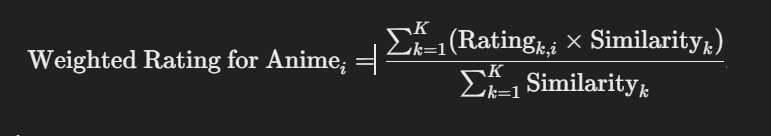

Where:

𝐾 is the number of neighbors,
Rating
𝑘
,
𝑖
Rating 
k,i
​
  is the rating of anime 
𝑖
i by neighbor 
𝑘
k,
Similarity
𝑘
Similarity 
k
​
  is the similarity score between the target user and neighbor 
𝑘
k.



Key Idea:
Neighbors with higher similarity scores (i.e., more similar to the user) have more influence on the final recommendation.


This approach is more accurate than just taking an unweighted average, as it accounts for how much you can "trust" the neighbor's opinion based on how similar they are to the user.

Origin of the Concept:
Collaborative Filtering: This is a common approach in recommendation systems where you find similar users (or items) and make recommendations based on their preferences. In user-based collaborative filtering, recommendations are made by looking at other users who have similar behavior to the target user.


Weighted Average: To avoid treating all similar users equally, you use their similarity scores (often derived from distance measures like cosine similarity or Euclidean distance). This allows you to apply weights when aggregating their ratings. The more similar the user, the higher their contribution to the final recommendation.


The Formula:

The formula is a direct application of a weighted average. In mathematics and statistics, a weighted average takes into account different "weights" for different data points, where the weight represents the importance of each point.


In this case, the similarity score acts as the weight for each neighbor’s rating. The sum of the weighted ratings is then divided by the sum of the weights (similarity scores) to give a final recommendation.


Practical Use in Recommender Systems:
Weighted Average in KNN-based Collaborative Filtering: When using K-nearest neighbors (KNN) for recommendations, instead of averaging the ratings of the K-nearest neighbors, you can weight their ratings based on how similar they are to the target user.
For example, if one user is highly similar (similarity score close to 1), their opinion on an item should matter more than that of a user who is only somewhat similar (similarity score closer to 0).
General Form of the Weighted Average:
In any context where weighted averages are used, the formula is:

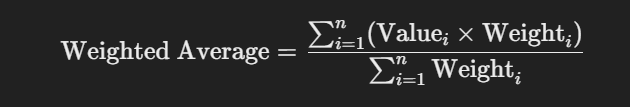

In [53]:
def get_anime_name_for_cf(recommend_anime):
    
        anime_names = merged_data[merged_data['anime_id'].isin(recommend_anime.index[0:])]
        return anime_names[['anime_id','name' , 'genre']].drop_duplicates()  



In [54]:
def recommend_anime_cf(user_id, K=3):
    # Get the K nearest neighbors for the user
    user_idx = user_similarity_df.index.get_loc(user_id)
    distances, suggestions = model.kneighbors(user_similarity_df.iloc[user_idx, :].values.reshape(1, -1), n_neighbors=K+1)

    # Collect anime ratings from the neighbors (excluding the user itself)
    neighbor_anime_ratings = anime_rating_pivot.iloc[suggestions[0][1:]]  # Take K neighbors' ratings
    similarity_scores = distances[0][1:]  # Similarity scores for the neighbors (excluding user itself)

    # Make sure similarity_scores has the same number of elements as the number of neighbors
    similarity_scores = pd.Series(similarity_scores, index=neighbor_anime_ratings.index)

    # Calculate the weighted average of the neighbors' ratings
    weighted_ratings = (neighbor_anime_ratings.T * similarity_scores).T.sum(axis=0) / similarity_scores.sum()

    # Get anime the user hasn't rated yet
    user_ratings = anime_rating_pivot.loc[user_id]
    unseen_anime = weighted_ratings[user_ratings == 0]

    # Recommend the top N unseen anime
    recommended_anime = unseen_anime.sort_values(ascending=False).head(K)

    return get_anime_name_for_cf(recommended_anime)


In [55]:
recommend_anime_cf(71893 , 10)

,anime_id,name,genre
348455,5081,Bakemonogatari,"Mystery, Romance, Supernatural, Vampire,TV"
580786,10162,Usagi Drop,"Josei, Slice of Life,TV"
892310,18153,Kyoukai no Kanata,"Fantasy, Slice of Life, Supernatural,TV"
1029358,22147,Amagi Brilliant Park,"Comedy, Magic,TV"
1124125,28907,"Gate: Jieitai Kanochi nite, Kaku Tatakaeri","Action, Adventure, Fantasy, Military,TV"
1829533,13601,Psycho-Pass,"Action, Police, Psychological, Sci-Fi,TV"
1938079,23283,Zankyou no Terror,"Psychological, Thriller,TV"
2481401,10800,Chihayafuru,"Drama, Game, Josei, Slice of Life, Sports,TV"
2496655,14397,Chihayafuru 2,"Drama, Game, Josei, Slice of Life, Sports,TV"
2823266,8425,Gosick,"Drama, Historical, Mystery, Romance,TV"


In [56]:
# Get the anime and ratings for the chosen user (user_id = 5)
user_ratings = merged_data[merged_data['user_id'] == 71893][['anime_id', 'name', 'rating_x', 'genre']]

# Display anime this user rated highly (e.g., ratings >= 7)
user_favorites = user_ratings[user_ratings['rating_x'] >= 7]
print("Anime rated highly by user_id 5:")
user_favorites[['name', 'rating_x', 'genre']].head(50)


Anime rated highly by user_id 5:


,name,rating_x,genre
4147,Trigun,9,"Action, Comedy, Sci-Fi,TV"
13311,Naruto,7,"Action, Comedy, Martial Arts, Shounen, Super P..."
14692,Prince of Tennis,8,"Action, Comedy, School, Shounen, Sports,TV"
17882,School Rumble,9,"Comedy, Romance, School, Shounen,TV"
23787,Neon Genesis Evangelion,8,"Action, Dementia, Drama, Mecha, Psychological,..."
26865,Rurouni Kenshin: Meiji Kenkaku Romantan,9,"Action, Adventure, Comedy, Historical, Romance..."
30405,Akira,10,"Action, Adventure, Horror, Military, Sci-Fi, S..."
40254,Black Cat,9,"Adventure, Comedy, Sci-Fi, Shounen, Super Powe..."
74806,Sen to Chihiro no Kamikakushi,10,"Adventure, Drama, Supernatural,Movie"
79737,Samurai Champloo,9,"Action, Adventure, Comedy, Historical, Samurai..."


# Content Based

In [57]:
import copy

df = copy.deepcopy(data)


In [58]:
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')


In [59]:
df['episodes'].isnull().sum()

187

In [60]:
df['episodes'].fillna(df['episodes'].mean(), inplace=True)
df['episodes'].isnull().sum()

0

In [61]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Properly handle 'genre_list' if it's a list of genres
df['genre_str'] = df['genre'].apply(lambda x: ','.join(x) if isinstance(x, list) else str(x))

# Convert 'type' to string
df['type_str'] = df['type'].astype(str)

# Create combined feature string including normalized episodes
df['features'] = df['genre_str'] + ' ' + df['type_str'] 



In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
# Ensure 'episodes' is numeric
df['episodes'] = pd.to_numeric(df['episodes'], errors='coerce')

# Normalize episodes
scaler = StandardScaler()
df['episodes_normalized'] = scaler.fit_transform(df[['episodes']])

In [64]:
df['members_normalized'] = scaler.fit_transform(df[['members']])

In [65]:
df['features'][0]

'Drama, Romance, School, Supernatural Movie'

In [66]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['features'])
tfidf_matrix.shape

(12017, 52)

In [67]:
df.columns

Index(['anime_id', 'name', 'genre', 'type', 'episodes', 'rating', 'members',
       'genre_str', 'type_str', 'features', 'episodes_normalized',
       'members_normalized'],
      dtype='object')

In [68]:
df.head()

,anime_id,name,genre,type,episodes,rating,members,genre_str,type_str,features,episodes_normalized,members_normalized
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630,"Drama, Romance, School, Supernatural",Movie,"Drama, Romance, School, Supernatural Movie",-0.245825,3.292044
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,"Action, Adventure, Drama, Fantasy, Magic, Mili...",1.102424,14.002410
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Action, Comedy, Historical, Parody, Samurai, S...",0.824214,1.732216
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572,"Sci-Fi, Thriller",TV,"Sci-Fi, Thriller TV",0.246393,11.833499
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266,"Action, Comedy, Historical, Parody, Samurai, S...",TV,"Action, Comedy, Historical, Parody, Samurai, S...",0.824214,2.400518


In [69]:
from scipy.sparse import hstack


combined_features = hstack([tfidf_matrix, df[['episodes_normalized', 'members_normalized']].values])

cosine_sim = cosine_similarity(combined_features, combined_features)

In [70]:
import joblib

joblib.dump(cosine_sim , 'cosine_sim.pkl')

['cosine_sim.pkl']

In [71]:
# Get recommendations based on the first anime (index 0)
anime_row = df.loc[data['anime_id'] == 5]

similarity_scores = list(enumerate(cosine_sim[anime_row.index[0]]))
similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

# Output the indices and similarity scores of the most similar animes
recommendations = similarity_scores[1:4]  # Top 3 recommendations excluding itself
recommendations

pd.DataFrame(get_anime_name_for_cb(recommendations))

,anime_id,name,genre,type,episodes,rating,members
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297
2828,27655,Aldnoah.Zero 2nd Season,"Action, Mecha, Sci-Fi, Space",TV,12,7.15,149364
3058,21431,Gokukoku no Brynhildr,"Drama, Mystery, Sci-Fi, Seinen",TV,13,7.09,159899


In [72]:

def get_anime_name_for_cb(recommendations):
    anime_list = []
    for rec in recommendations:
        anime = data.iloc[rec[0]]
    
        anime_list.append(anime)
    return anime_list
    
def get_reccomendations_cb(anime_id , K):
    anime_row = df.loc[data['anime_id'] == anime_id]

    similarity_scores = list(enumerate(cosine_sim[anime_row.index[0]]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    recommendations = similarity_scores[1:K+1]
    recommendations = get_anime_name_for_cb(recommendations)
    return pd.DataFrame(recommendations)    
    
get_reccomendations_cb(5 , 10)

,anime_id,name,genre,type,episodes,rating,members
25,7311,Suzumiya Haruhi no Shoushitsu,"Comedy, Mystery, Romance, School, Sci-Fi, Supe...",Movie,1,8.81,240297
2828,27655,Aldnoah.Zero 2nd Season,"Action, Mecha, Sci-Fi, Space",TV,12,7.15,149364
3058,21431,Gokukoku no Brynhildr,"Drama, Mystery, Sci-Fi, Seinen",TV,13,7.09,159899
225,5681,Summer Wars,"Comedy, Sci-Fi",Movie,1,8.30,223359
1779,20787,Black Bullet,"Action, Mystery, Sci-Fi, Seinen",TV,13,7.44,320267
132,2236,Toki wo Kakeru Shoujo,"Adventure, Drama, Romance, Sci-Fi",Movie,1,8.44,289206
294,2759,Evangelion: 1.0 You Are (Not) Alone,"Action, Mecha, Sci-Fi",Movie,1,8.21,194561
493,5630,Higashi no Eden,"Action, Comedy, Drama, Mystery, Romance, Sci-F...",TV,11,8.03,276593
641,202,Wolf&#039;s Rain,"Action, Adventure, Drama, Fantasy, Mystery, Sc...",TV,26,7.93,171863
90,3784,Evangelion: 2.0 You Can (Not) Advance,"Action, Mecha, Sci-Fi",Movie,1,8.53,182224


# Hybrid Recommendation

Steps to create a hybrid function:

**Collaborative Filtering**: This part recommends items based on similar users' preferences.

**Content-Based Filtering**: This part recommends items based on the features of the items themselves, such as genres, popularity, or other metadata.
We can combine these two approaches by:

Giving a weight to each recommendation (e.g., 50% collaborative filtering, 50% content-based filtering).
Merging both results into a final ranked recommendation list.

In [73]:
def hybrid_recommendation(user_id, anime_id, K=5, hybrid_weight=0.5):
    """
    Hybrid recommendation combining collaborative filtering and content-based filtering.
    
    Parameters:
    user_id (int): ID of the user for whom recommendations are being made.
    anime_id (int): ID of the anime for content-based filtering.
    K (int): Number of recommendations to generate.
    hybrid_weight (float): Weight given to collaborative filtering (1 - hybrid_weight goes to content-based).
    
    Returns:
    DataFrame: Recommended anime based on hybrid model.
    """
    
    # --- Content-Based Filtering ---
    recommendations_cb = get_reccomendations_cb(anime_id , K).reset_index(drop=True)

    # --- Collaborative Filtering ---
    recommendations_cf = recommend_anime_cf(user_id, K=K).reset_index(drop=True)
    
    # --- Hybrid Recommendation ---
    # Combine content-based and collaborative filtering recommendations by applying the hybrid weight
    # Assign scores to both content-based and collaborative results based on their weight
    recommendations_cb['score'] = recommendations_cb.index.map(lambda x: (1 - hybrid_weight) * (K - x))
    recommendations_cf['score'] = recommendations_cf.index.map(lambda x: hybrid_weight * (K - x))
    
    # Combine both sets of recommendations
    hybrid_recommendations = pd.concat([recommendations_cb, recommendations_cf])
    
    # Remove duplicates (if any) and sort by score
    hybrid_recommendations = hybrid_recommendations.drop_duplicates(subset='name').sort_values(by='score', ascending=False).head(K)
    
    return hybrid_recommendations.reset_index(drop=True)

hybrid_recs = hybrid_recommendation(user_id=5, anime_id=21, K=10, hybrid_weight=0.5)
print("Hybrid Recommendations for :\n" , data['name'][data['anime_id']==21])

hybrid_recs


Hybrid Recommendations for :
 74    One Piece
Name: name, dtype: object


,anime_id,name,genre,type,episodes,rating,members,score
0,16498,Shingeki no Kyojin,"Action, Drama, Fantasy, Shounen, Super Power",TV,25,8.54,896229.0,5.0
1,18679,Kill la Kill,"Action, Comedy, School, Super Power",TV,24,8.23,508118.0,4.5
2,10793,Guilty Crown,"Action, Drama, Sci-Fi, Super Power",TV,22,7.81,460959.0,4.0
3,11061,Hunter x Hunter (2011),"Action, Adventure, Shounen, Super Power,TV",NaN,NaN,NaN,NaN,4.0
4,1735,Naruto: Shippuuden,"Action, Comedy, Martial Arts, Shounen, Super P...",TV,Unknown,7.94,533578.0,3.5
5,2904,Code Geass: Hangyaku no Lelouch R2,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",TV,25,8.98,572888.0,3.0
6,31043,Boku dake ga Inai Machi,"Mystery, Psychological, Seinen, Supernatural,TV",NaN,NaN,NaN,NaN,3.0
7,1575,Code Geass: Hangyaku no Lelouch,"Action, Mecha, Military, School, Sci-Fi, Super...",TV,25,8.83,715151.0,2.5
8,2001,Tengen Toppa Gurren Lagann,"Action, Adventure, Comedy, Mecha, Sci-Fi,TV",NaN,NaN,NaN,NaN,2.5
9,30276,One Punch Man,"Action, Comedy, Parody, Sci-Fi, Seinen, Super ...",TV,12,8.82,552458.0,2.0


In [74]:
import requests

def get_anime_image_url(anime_id):
    """
    Fetches the anime image URL using the Jikan API.
    
    Parameters:
    anime_id (int): ID of the anime.

    Returns:
    str: URL of the anime image.
    """
    api_url = f"https://api.jikan.moe/v4/anime/{anime_id}"
    response = requests.get(api_url)
    data = response.json()
    
    # Extract the image URL
    if response.status_code == 200:
        return data['data']['images']['jpg']['image_url']
    else:
        return "https://placekitten.com/200/300"


In [75]:
!pip install flask flask-ngrok


# API CREATING


In [77]:
from flask import Flask, request, jsonify
import pandas as pd
import joblib
import threading

# Initialize the Flask app
app = Flask(__name__)

# Sample data and models (replace with your actual file paths)
# Load the required data (e.g., from CSVs or .pkl files)


# Function to handle content-based recommendations
def get_anime_name_for_cb(recommendations):
    anime_list = []
    for rec in recommendations:
        anime = data.iloc[rec[0]]
        anime_list.append(anime)
    return anime_list

# Content-based recommendation system
def get_reccomendations_cb(anime_id , K):
    anime_row = data.loc[data['anime_id'] == anime_id]
    similarity_scores = list(enumerate(cosine_sim[anime_row.index[0]]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    recommendations = similarity_scores[1:K+1]
    recommendations = get_anime_name_for_cb(recommendations)
    return pd.DataFrame(recommendations)

# Collaborative filtering recommendation system
def get_anime_name_for_cf(recommend_anime):
    anime_names = merged_data[merged_data['anime_id'].isin(recommend_anime.index[0:])]
    return anime_names[['anime_id','name' , 'genre']].drop_duplicates()

def recommend_anime_cf(user_id, K=3):
    user_idx = user_similarity_df.index.get_loc(user_id)
    distances, suggestions = model.kneighbors(user_similarity_df.iloc[user_idx, :].values.reshape(1, -1), n_neighbors=K+1)
    neighbor_anime_ratings = anime_rating_pivot.iloc[suggestions[0][1:]]
    similarity_scores = pd.Series(distances[0][1:], index=neighbor_anime_ratings.index)
    weighted_ratings = (neighbor_anime_ratings.T * similarity_scores).T.sum(axis=0) / similarity_scores.sum()
    user_ratings = anime_rating_pivot.loc[user_id]
    unseen_anime = weighted_ratings[user_ratings == 0]
    recommended_anime = unseen_anime.sort_values(ascending=False).head(K)
    return get_anime_name_for_cf(recommended_anime)

# Hybrid recommendation system combining content-based and collaborative filtering
def hybrid_recommendation(user_id, anime_id, K=10, hybrid_weight=0.5):
    recommendations_cb = get_reccomendations_cb(anime_id, K).reset_index(drop=True)
    recommendations_cf = recommend_anime_cf(user_id, K).reset_index(drop=True)
    recommendations_cb['score'] = recommendations_cb.index.map(lambda x: (1 - hybrid_weight) * (K - x))
    recommendations_cf['score'] = recommendations_cf.index.map(lambda x: hybrid_weight * (K - x))
    hybrid_recommendations = pd.concat([recommendations_cb, recommendations_cf])
    hybrid_recommendations = hybrid_recommendations.drop_duplicates(subset='name').sort_values(by='score', ascending=False).head(K)
    return hybrid_recommendations.reset_index(drop=True)

# API endpoint for hybrid recommendations
@app.route('/api/recommend', methods=['POST'])
def recommend_anime():
    data = request.get_json()
    
    # Check if user_id is provided in the request
    if 'user_id' not in data or 'selected_anime_id' not in data:
        return jsonify({"error": "Missing user_id or selected_anime_id in request."}), 400

    user_id = int(data['user_id'])  

    # Check if user_id exists in the ratings DataFrame:
    if not rating[rating['user_id'] == user_id].empty:
        anime_id = data['selected_anime_id']
        hybrid_weight = data.get('hybrid_weight', 0.5)
        recommendations = hybrid_recommendation(user_id=user_id, K=10, anime_id=anime_id, hybrid_weight=hybrid_weight)
        
        # Replace NaN values with None for JSON compatibility
        recommendations = recommendations.where(pd.notnull(recommendations), "None")

        recommendations_json = recommendations.to_dict(orient='records')

        # Debugging output
        print(f"Recommendations for user_id {user_id} with selected_anime_id {anime_id}: {recommendations_json}")

        return jsonify(recommendations_json)
    else:
        # Return error message if user_id has no ratings
        return jsonify({"error": "Choose another User ID."}), 400

        
    
    

# API test endpoint
@app.route('/api', methods=['GET'])
def get_T():
    return 'API is working!'

# Function to run Flask app in a separate thread
def run_app():
    app.run(host='0.0.0.0', port=6001)

# Run the Flask app in a separate thread to avoid blocking Jupyter notebook execution
flask_thread = threading.Thread(target=run_app)
flask_thread.start()

 * Serving Flask app '__main__'


 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:6001
 * Running on http://192.168.1.8:6001
Press CTRL+C to quit
